# Data collection and basic featurizer usage tutorial
This notebook reads all output of VerraChem v3.0 ran on the following structures:
<ol>
    <p>CB7 Gilson</p>
    <p>Mobley Set1</p>
    <p>Mobley Set2</p>
    <p>Sampl3</p>
    <p>Sampl6</p>
    <p>Sampl4</p>
    <p>BRD4 - the only protein ligand structure</p>
</ol>
The above datasets are used to prepare input to PRGCN model. There are more datasets in VM2 that can be used to predict only binding free energy.
We also go through very basic featurizer use cases. Here, we focus on features can be obtained using RDKit and only do analysis on dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit
import pickle

2023-06-29 14:49:27.114061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 14:49:27.149326: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 14:49:27.150248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 14:49:27.779177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
PDBs = {}

In [3]:
VM2_dataset_path = '/home/ali/GBNN/Datasets/VM2_data/'

# cb7_gilson_feprocess

# CSV

Reading all output generated using VM2

In [4]:
df_com = pd.read_csv(VM2_dataset_path + 'cb7_gilson_feprocess/cb7_feprocess_complex.csv')
df_lig = pd.read_csv(VM2_dataset_path + 'cb7_gilson_feprocess/feprocess_ligand.csv')
df_hos = pd.read_csv(VM2_dataset_path + 'cb7_gilson_feprocess/cb7_feprocess_host.csv')

Storing all structures as RDKit Mol object to use them in analysis.

In [5]:
path = VM2_dataset_path + 'cb7_gilson_feprocess/'
host_pdb = Chem.SDMolSupplier(path + 'hosts/cb7.sdf')[0]
ligands_pdb = Chem.SDMolSupplier(path + 'ligands/cb7_ligands.sdf')
PDBs_cb7_gilson = {'gilson_cb7--guest%d' % (i + 1): Chem.CombineMols(host_pdb, ligands_pdb[i]) for i in range(29)}
PDBs.update(PDBs_cb7_gilson)

# cd_mobley_set2

Reading all output generated using VM2

In [7]:
df_com = pd.concat([df_com, pd.read_csv(VM2_dataset_path + 'cd_mobley_set2/b-cyclodex_feprocess_complex.csv')], ignore_index=True)
df_lig = pd.concat([df_lig, pd.read_csv(VM2_dataset_path + 'cd_mobley_set2/feprocess_ligand.csv')], ignore_index=True)
df_hos = pd.concat([df_hos, pd.read_csv(VM2_dataset_path + 'cd_mobley_set2/b-cyclodex_feprocess_host.csv')], ignore_index=True)

Storing all structures as RDKit Mol object to use them in analysis.

In [8]:
path = VM2_dataset_path + 'cd_mobley_set2/'
host_pdb = Chem.SDMolSupplier(path + 'hosts/b-cyclodex.sdf')[0]
ligands_pdb = Chem.SDMolSupplier(path + 'ligands/cdset2_ligands.sdf')
PDBs_cdset2 = {'mobley_set2_b-cyclodex--guest-%d' % (i + 1) if i < 12 else 'mobley_set2_b-cyclodex--guest-s%d' % (i + 1): Chem.CombineMols(host_pdb, ligands_pdb[i]) for i in range(21)}
PDBs.update(PDBs_cdset2)

# TODO: read data from all other datasets not used here and store their information in df_all and PDBs variables respectively
## Clone dataset from the repository and check VM2_data directory and add structures not mentioned here (do not read BRD4 as it is a protein-ligand structure and is added in the following)

# TODO: Draw histogram graphs based on the following properties:
<ol>
    <p>Bond types</p>
    <p>Number of atoms (done as a sample)</p>
    <p>Number of bonds</p>
    <p>Number of aromatic atoms (in bins of 1)</p>
    </ol>

[]

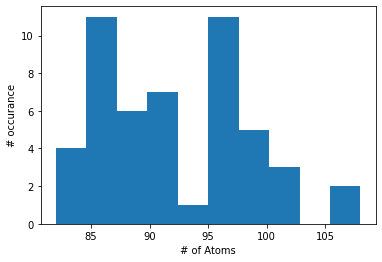

In [11]:
num_atoms = []
for pdb_name in PDBs.keys():
    pdb = PDBs[pdb_name]
    num_atoms.append(pdb.GetNumAtoms())
plt.hist(num_atoms)
plt.xlabel('# of Atoms')
plt.ylabel('# occurance')
plt.plot()

# TODO: now add BRD4 structures and compare the above properties in new structures

# BRD4 protein

Reading all output generated using VM2

In [ ]:
df_com = pd.concat([df_com, pd.read_csv(VM2_dataset_path + 'BRD4/BRD4_p4a_tleap_vm2_complex.csv')], ignore_index=True)
df_hos = pd.concat([df_hos, pd.read_csv(VM2_dataset_path + 'BRD4/BRD4_p4a_tleap_vm2_protein.csv')], ignore_index=True)
df_lig = pd.concat([df_lig, pd.read_csv(VM2_dataset_path + 'BRD4/vm2_ligand.csv')], ignore_index=True)

Storing all structures as RDKit Mol object to use them in analysis.

In [10]:
path = VM2_dataset_path + 'BRD4/'
protein = Chem.MolFromPDBFile(path + 'protein/BRD4_p4a_tleap.pdb')
ligands = [Chem.MolFromMolFile(path + 'ligands/ligand-%d.mol'%(i + 1)) for i in range(10)]
PDBs_BRD4 = {'BRD4_p4a_tleap--ligand-%d'%i: Chem.CombineMols(protein, ligands[i]) for i in [3, 5, 6, 7, 8, 9]}
PDBs.update(PDBs_BRD4)